```
Student name: Nguyen Duc Dung
Student ID:   20160674
Class:        ICT.02 - K61
```



# Tasks

- Formulate the learning problem
- Choose a way to deal with missing value
- Choose a Machine Learning model 
- Do training / evaluation
- Make prediction for 10 testing samples

# Solving

## Import needed libraries

In [0]:
import re
import sys

import pandas as pd
import pandas.util.testing as tm
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from sklearn import preprocessing

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn import tree

from sklearn.model_selection import GridSearchCV

from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, r2_score, f1_score

## Read file from Drive

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
training_data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Homework1/1-training-data.csv")
testing_data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Homework1/20160674-test.csv",
                           names=['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'y'])

## Data analyzing

In [0]:
training_data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,y
0,?,3.683393747,?,-0.634417312,1,0.409611744,7,30,5
1,?,?,60,1.573617763,0,0.639813727,7,30,5
2,?,3.096229013,67,0.249917163,0,0.089343498,?,80,3
3,2.887677333,3.870994828,68,-1.347755064,?,1.276985638,?,60,5
4,2.731273335,3.945024383,79,1.967319655,1,2.487831092,?,100,4


In [0]:
training_data.tail()

,A1,A2,A3,A4,A5,A6,A7,A8,y
995,3.125917,3.245430,68.0,-0.142998,0.0,2.540562,7.0,15.0,4.0
996,2.566080,3.567651,65.5,-0.618728,1.0,2.414309,7.0,70.0,4.0
997,1.783414,3.596953,65.5,0.411349,0.0,1.234720,7.0,60.0,3.0
998,1.633291,4.130596,65.5,1.938254,0.0,-1.389201,6.0,0.0,4.0
999,1.417296,4.138071,65.0,2.107206,0.0,-0.751386,6.0,0.0,3.0


In [0]:
training_data.shape

(1000, 9)

In [0]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   A1      1000 non-null   object
 1   A2      1000 non-null   object
 2   A3      1000 non-null   object
 3   A4      1000 non-null   object
 4   A5      1000 non-null   object
 5   A6      1000 non-null   object
 6   A7      1000 non-null   object
 7   A8      1000 non-null   object
 8   y       1000 non-null   int64 
dtypes: int64(1), object(8)
memory usage: 70.4+ KB


In [0]:
training_data.describe()

,A1,A2,A3,A4,A5,A6,A7,A8,y
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.387968,3.613840,64.888000,-0.134717,0.196000,-0.307805,6.792000,23.085000,3.351000
std,1.127265,0.419025,6.341149,1.311291,0.397167,1.260653,0.610827,24.818818,1.289753
min,-1.448874,2.484787,41.000000,-1.722658,0.000000,-1.642174,6.000000,0.000000,1.000000
25%,0.926002,3.381371,62.000000,-1.347955,0.000000,-1.329206,6.000000,0.000000,2.000000
50%,1.417296,3.596953,65.500000,-0.618728,0.000000,-0.751386,7.000000,15.000000,4.000000
75%,1.984458,3.851148,68.000000,1.281885,0.000000,0.375000,7.000000,35.000000,4.000000
max,3.983271,4.912296,79.000000,2.481077,1.000000,2.768033,9.000000,100.000000,6.000000


In [0]:
testing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      15 non-null     float64
 1   A2      15 non-null     float64
 2   A3      15 non-null     int64  
 3   A4      15 non-null     float64
 4   A5      15 non-null     int64  
 5   A6      15 non-null     float64
 6   A7      15 non-null     int64  
 7   A8      15 non-null     int64  
 8   y       15 non-null     int64  
dtypes: float64(4), int64(5)
memory usage: 1.2 KB


## Data cleaning

We need to change all that missing values to NaN (standing for not a number).

In [0]:
# replace all the value '?' by NaN
for column in training_data:
    training_data[column] = pd.to_numeric(training_data[column], errors='coerce')

In [0]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      1000 non-null   float64
 1   A2      1000 non-null   float64
 2   A3      1000 non-null   float64
 3   A4      1000 non-null   float64
 4   A5      1000 non-null   float64
 5   A6      1000 non-null   float64
 6   A7      1000 non-null   float64
 7   A8      1000 non-null   float64
 8   y       1000 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 70.4 KB


Then, we replace all the missing values by the median values

In [0]:
# fill all the NaN values
training_data.fillna(training_data.median(), inplace = True)

In [0]:
# View the training dataset
training_data

,A1,A2,A3,A4,A5,A6,A7,A8,y
0,1.417296,3.683394,65.5,-0.634417,1.0,0.409612,7.0,30.0,5
1,1.417296,3.596953,60.0,1.573618,0.0,0.639814,7.0,30.0,5
2,1.417296,3.096229,67.0,0.249917,0.0,0.089343,7.0,80.0,3
3,2.887677,3.870995,68.0,-1.347755,0.0,1.276986,7.0,60.0,5
4,2.731273,3.945024,79.0,1.967320,1.0,2.487831,7.0,100.0,4
...,...,...,...,...,...,...,...,...,...
995,3.125917,3.245430,68.0,-0.142998,0.0,2.540562,7.0,15.0,4
996,2.566080,3.567651,65.5,-0.618728,1.0,2.414309,7.0,70.0,4
997,1.783414,3.596953,65.5,0.411349,0.0,1.234720,7.0,60.0,3
998,1.633291,4.130596,65.5,1.938254,0.0,-1.389201,6.0,0.0,4


The data contains discreted value with 1000 rows and 9 columns, some values of parameters are missing. We found that the data type of column 'y' aka the result of the problem is discrete integer values, so this is classification problem.

## Training model

We will use two popular approaches which are appropriate with the problem: Random Forest and SVM. At first, I will split the dataset into train and test using sklearn with the popular ratio 70/30. 

In [0]:
X = np.array(training_data[training_data.columns[:-1]])
Y = np.array(training_data[training_data.columns[-1]])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=6)
print (X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(700, 8) (300, 8) (700,) (300,)


### Training with Random Forest model

With Random Forest model, we will use the RandomForestClassifier that is the Random Forest model for classification problem

#### Find the best parameters for Random Forest by using Grid Search Cross-Validation

The parameters that we choose to train this model are the number of decision trees, maximum depth of each tree and the minimum samples leaf.

In [0]:
rf_param_grid = {
              "n_estimators":[50, 100, 200, 300, 400, 500, 600, 800, 1000],
              'max_depth': [3, 4, 5, 6, 8],
              'min_samples_leaf': [3, 4, 5, 6, 8]
             }

rf_grid = GridSearchCV(estimator=RandomForestClassifier(random_state=6),
                 param_grid = rf_param_grid,   
                 scoring="accuracy",
                 cv = 5,
                 n_jobs = 1)

rf_grid.fit(X_train,Y_train)
rf_grid_best = rf_grid.best_estimator_

print("Best Model Parameter: ", rf_grid.best_params_)

Best Model Parameter:  {'max_depth': 8, 'min_samples_leaf': 3, 'n_estimators': 800}


#### Training model with the found parameters

In [0]:
rf_model = RandomForestClassifier (n_estimators = 800,
                                   criterion = 'gini',
                                   bootstrap = True,
                                   max_depth=8,
                                   min_samples_leaf=3,
                                   random_state=6)

rf_model.fit (X_train, Y_train)
rf_predict = rf_model.predict(X_test)

In [0]:
print ("Accuracy: ", metrics.accuracy_score(Y_test, rf_predict))

Accuracy:  0.8433333333333334


### Training with SVM model

#### Find the best parameters for SVM by using Grid Search Cross-Validation
Some parameters will be used in SVM:
- Kernel: RBF (Radial Basis Function). RBF can map an input space in infinite dimensional space.
- gamma
- C


In [0]:
svm_param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [0.1, 0.2, 0.3, 0.5, 1.0], 
              'kernel': ['rbf']
             }

svm_grid = GridSearchCV(SVC(),
                        param_grid = svm_param_grid,
                        refit = True,
                        scoring="accuracy",
                        verbose = 3,
                        cv = 5)


svm_grid.fit(X_train, Y_train) 

print("Best Model Parameter: ", svm_grid.best_params_) 

#### Training model with the found parameters

After using Grid Search CV, we found the best parameters are: gamma = 0.3, C = 1000

In [0]:
svm_model = SVC (kernel = 'rbf' , gamma = 0.3, C = 1000.0, random_state=6)

svm_model.fit(X_train, Y_train)
svm_predict = svm_model.predict(X_test)



In [0]:
print ("Accuracy: ", metrics.accuracy_score(Y_test, svm_predict))

Accuracy:  0.92


## Evaluation model

We will evaluate the model using Cross-Validation

### Random Forest model

In [0]:
cv_rf_model = RandomForestClassifier (n_estimators = 800,
                                   criterion = 'gini',
                                   bootstrap = True,
                                   max_depth=8,
                                   min_samples_leaf=3,
                                   random_state=6)
rf_scores = cross_val_score(cv_rf_model, X, Y, cv=5)

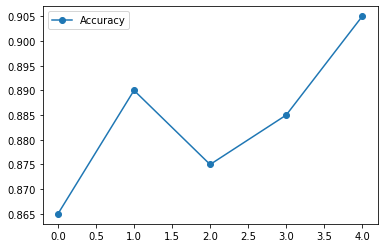

In [0]:
linear_score_data = np.array(rf_scores)
plt.plot(linear_score_data, '-o')
plt.legend(['Accuracy'])
plt.show()

### SVM model

In [0]:
cv_svm_model = SVC (kernel = 'rbf' , gamma = 0.3, C = 1000.0, random_state=6)

svm_scores = cross_val_score(cv_svm_model, X, Y, cv=5)

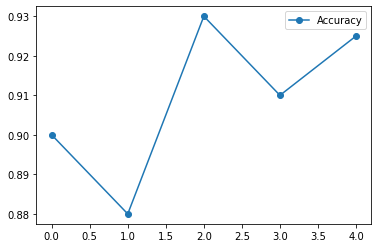

In [0]:
linear_score_data = np.array(svm_scores)
plt.plot(linear_score_data, '-o')
plt.legend(['Accuracy'])
plt.show()

As we can see, the SVM model has better accuacy. Therefore, we will choose the SVM model to predict the testing data.

## Predict the result of testing data

In [0]:
testing_X = np.array (testing_data[testing_data.columns[:-1]])
testing_Y = np.array (testing_data[testing_data.columns[-1]])
Y_prediction = svm_model.predict (testing_X)
print ("Initial value of y: ", testing_Y)
print ("Prediction: ", Y_prediction)

Initial value of y:  [5 4 4 1 2 0 0 0 0 0 0 0 0 0 0]
Prediction:  [5 4 4 1 2 5 4 4 3 5 5 5 4 2 5]


We can see that, the accuracy in the first 5 rows is 100% so the result of the predicted values might be really good.